# 📊 Exploratory Data Analysis: Customer Churn Prediction

**Objective**: Understand the data, clarify the target variable, and formulate business-driven hypotheses before modeling.

---

## Table of Contents
1. [Setup & Data Loading](#1-setup--data-loading)
2. [Data Understanding](#2-data-understanding)
3. [Target Clarity](#3-target-clarity)
4. [Business Hypotheses](#4-business-hypotheses)

---

## 1. Setup & Data Loading

In [1]:
# Core Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)
warnings.filterwarnings('ignore')

# Plot styling
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

print("✅ Libraries loaded successfully!")

✅ Libraries loaded successfully!


In [2]:
# Load the dataset
df = pd.read_csv('../data/raw/churn.csv')

print(f"📦 Dataset Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"📊 Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

📦 Dataset Shape: 7,043 rows × 23 columns
📊 Memory Usage: 7.90 MB


---

## 2. Data Understanding

### 2.1 First Look at the Data

In [3]:
# Preview first few rows
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0,0,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,0,0,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,0,0,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,0,0,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,0,2,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,0,0,No


In [4]:
# Preview last few rows (check for data consistency)
df.tail(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,0,0,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,0,5,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0,0,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,0,0,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,2,0,No


### 2.2 Data Types & Structure

In [5]:
# Comprehensive data info
print("=" * 60)
print("DATA TYPES & NON-NULL COUNTS")
print("=" * 60)
df.info()

DATA TYPES & NON-NULL COUNTS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBill

In [6]:
# Create a summary DataFrame for data types
dtype_summary = pd.DataFrame({
    'Column': df.columns,
    'Data Type': df.dtypes.values,
    'Non-Null Count': df.notnull().sum().values,
    'Null Count': df.isnull().sum().values,
    'Null %': (df.isnull().sum().values / len(df) * 100).round(2),
    'Unique Values': df.nunique().values
})

dtype_summary

,Column,Data Type,Non-Null Count,Null Count,Null %,Unique Values
0,customerID,object,7043,0,0.00,7043
1,gender,object,7043,0,0.00,2
2,SeniorCitizen,int64,7043,0,0.00,2
3,Partner,object,7043,0,0.00,2
4,Dependents,object,7043,0,0.00,2
5,tenure,int64,7043,0,0.00,73
6,PhoneService,object,7043,0,0.00,2
7,MultipleLines,object,7043,0,0.00,3
8,InternetService,object,7043,0,0.00,3
9,OnlineSecurity,object,7043,0,0.00,3


### 2.3 Numerical Features Summary

In [7]:
# Statistical summary of numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"📈 Numerical Columns ({len(numerical_cols)}): {numerical_cols}\n")

df[numerical_cols].describe().T

📈 Numerical Columns (5): ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'numAdminTickets', 'numTechTickets']



,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.00,0.16,0.37,0.00,0.00,0.00,0.00,1.00
tenure,7043.00,32.37,24.56,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.00,64.76,30.09,18.25,35.50,70.35,89.85,118.75
numAdminTickets,7043.00,0.52,1.28,0.00,0.00,0.00,0.00,5.00
numTechTickets,7043.00,0.42,1.25,0.00,0.00,0.00,0.00,9.00


### 2.4 Categorical Features Summary

In [8]:
# Categorical columns analysis
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"📝 Categorical Columns ({len(categorical_cols)}): {categorical_cols}\n")

# Value counts for each categorical column
for col in categorical_cols:
    print(f"\n{'='*50}")
    print(f"📌 {col} (Unique: {df[col].nunique()})")
    print(f"{'='*50}")
    print(df[col].value_counts())

📝 Categorical Columns (18): ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


📌 customerID (Unique: 7043)
customerID
7590-VHVEG    1
5575-GNVDE    1
3668-QPYBK    1
7795-CFOCW    1
9237-HQITU    1
             ..
6840-RESVB    1
2234-XADUH    1
4801-JZAZL    1
8361-LTMKD    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64

📌 gender (Unique: 2)
gender
Male      3555
Female    3488
Name: count, dtype: int64

📌 Partner (Unique: 2)
Partner
No     3641
Yes    3402
Name: count, dtype: int64

📌 Dependents (Unique: 2)
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

📌 PhoneService (Unique: 2)
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

📌 MultipleLines (Unique: 3)
MultipleLines
No                  3390
Yes                 2971

### 2.5 Data Quality Checks

In [9]:
# Check for duplicates
duplicate_count = df.duplicated().sum()
duplicate_customerid = df['customerID'].duplicated().sum()

print("🔍 DUPLICATE CHECK")
print("=" * 40)
print(f"Fully duplicate rows: {duplicate_count}")
print(f"Duplicate customerIDs: {duplicate_customerid}")

if duplicate_count == 0 and duplicate_customerid == 0:
    print("\n✅ No duplicates found - each customer appears exactly once.")
else:
    print("\n⚠️ Duplicates detected - needs investigation!")

🔍 DUPLICATE CHECK
Fully duplicate rows: 0
Duplicate customerIDs: 0

✅ No duplicates found - each customer appears exactly once.


In [10]:
# Check TotalCharges for issues (known to have whitespace values)
print("🔍 TOTALCHARGES ANALYSIS")
print("=" * 40)

# Check if TotalCharges is object type (string)
if df['TotalCharges'].dtype == 'object':
    # Find non-numeric values
    invalid_total_charges = df[pd.to_numeric(df['TotalCharges'], errors='coerce').isna()]
    print(f"Non-numeric TotalCharges values: {len(invalid_total_charges)}")
    
    if len(invalid_total_charges) > 0:
        print(f"\n📋 Rows with invalid TotalCharges:")
        print(invalid_total_charges[['customerID', 'tenure', 'TotalCharges', 'MonthlyCharges']].to_string())
        print(f"\n💡 Notice: These customers have tenure = 0 (new customers)")
else:
    print(f"TotalCharges is already numeric: {df['TotalCharges'].dtype}")

🔍 TOTALCHARGES ANALYSIS
Non-numeric TotalCharges values: 11

📋 Rows with invalid TotalCharges:
      customerID  tenure TotalCharges  MonthlyCharges
488   4472-LVYGI       0                        52.55
753   3115-CZMZD       0                        20.25
936   5709-LVOEQ       0                        80.85
1082  4367-NUYAO       0                        25.75
1340  1371-DWPAZ       0                        56.05
3331  7644-OMVMY       0                        19.85
3826  3213-VVOLG       0                        25.35
4380  2520-SGTTA       0                        20.00
5218  2923-ARZLG       0                        19.70
6670  4075-WKNIU       0                        73.35
6754  2775-SEFEE       0                        61.90

💡 Notice: These customers have tenure = 0 (new customers)


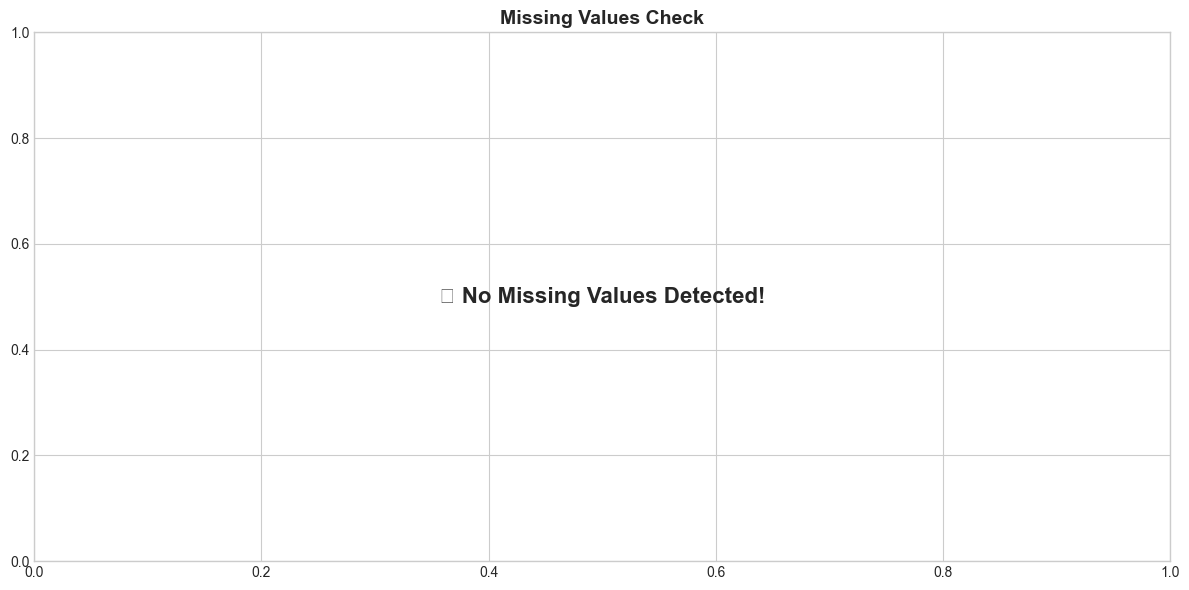

In [11]:
# Missing values heatmap visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Calculate missing percentage
missing_pct = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

if missing_pct.max() > 0:
    sns.barplot(x=missing_pct.values, y=missing_pct.index, palette='Reds_r', ax=ax)
    ax.set_xlabel('Missing Percentage (%)', fontsize=12)
    ax.set_ylabel('Features', fontsize=12)
    ax.set_title('Missing Values by Feature', fontsize=14, fontweight='bold')
else:
    ax.text(0.5, 0.5, '✅ No Missing Values Detected!', 
            ha='center', va='center', fontsize=16, fontweight='bold',
            transform=ax.transAxes)
    ax.set_title('Missing Values Check', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

### 2.6 Key Data Understanding Insights

#### ✅ What We Learned:

| Aspect | Finding |
|--------|--------|
| **Dataset Size** | 7,043 customers × 23 features |
| **Unit of Observation** | Each row = 1 customer account |
| **Time Granularity** | Point-in-time snapshot (no temporal history) |
| **Duplicates** | None (each customerID is unique) |
| **Missing Values** | TotalCharges has blank values for new customers (tenure=0) |

#### 📌 Feature Types:
- **Identifier**: customerID
- **Numerical (4)**: tenure, MonthlyCharges, TotalCharges, SeniorCitizen, numAdminTickets, numTechTickets
- **Categorical (17)**: Demographics, services, contract details
- **Target**: Churn (Yes/No)

---

## 3. Target Clarity

### 3.1 Target Variable Definition

> ⚠️ **CRITICAL**: Understanding the target variable correctly is essential. Getting this wrong invalidates the entire project.

In [12]:
# Target variable analysis
print("🎯 TARGET VARIABLE: Churn")
print("=" * 50)
print(f"\nData Type: {df['Churn'].dtype}")
print(f"Unique Values: {df['Churn'].unique()}")
print(f"\nValue Counts:")
print(df['Churn'].value_counts())
print(f"\nPercentage Distribution:")
print(df['Churn'].value_counts(normalize=True).mul(100).round(2))

🎯 TARGET VARIABLE: Churn

Data Type: object
Unique Values: ['No' 'Yes']

Value Counts:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Percentage Distribution:
Churn
No    73.46
Yes   26.54
Name: proportion, dtype: float64


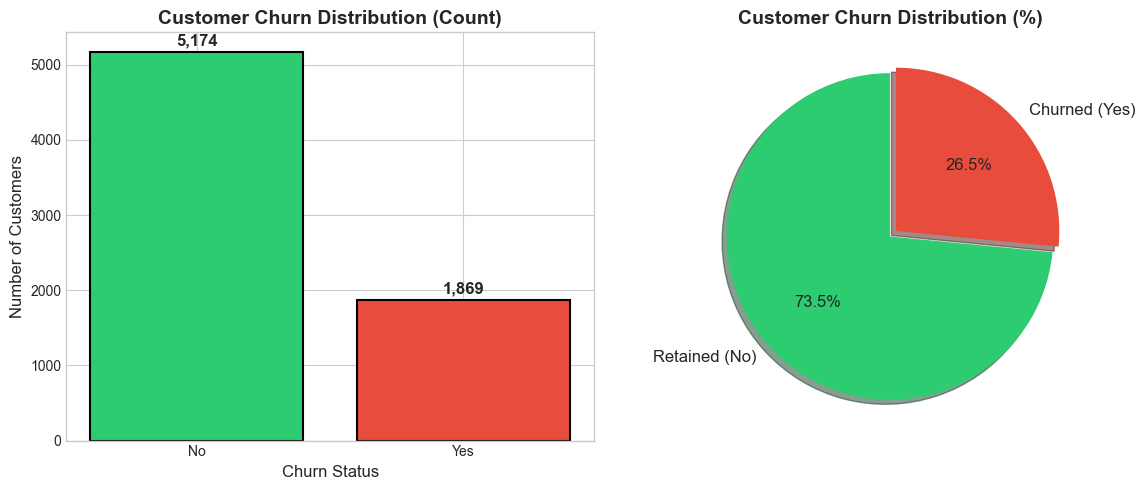

In [13]:
# Target distribution visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Count plot
colors = ['#2ecc71', '#e74c3c']  # Green for No, Red for Yes
churn_counts = df['Churn'].value_counts()

axes[0].bar(churn_counts.index, churn_counts.values, color=colors, edgecolor='black', linewidth=1.5)
axes[0].set_xlabel('Churn Status', fontsize=12)
axes[0].set_ylabel('Number of Customers', fontsize=12)
axes[0].set_title('Customer Churn Distribution (Count)', fontsize=14, fontweight='bold')

# Add value labels on bars
for i, (label, value) in enumerate(zip(churn_counts.index, churn_counts.values)):
    axes[0].text(i, value + 50, f'{value:,}', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Pie chart
axes[1].pie(churn_counts.values, labels=['Retained (No)', 'Churned (Yes)'], 
            colors=colors, autopct='%1.1f%%', startangle=90,
            explode=(0, 0.05), shadow=True, textprops={'fontsize': 12})
axes[1].set_title('Customer Churn Distribution (%)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

### 3.2 Target Variable Interpretation

| Attribute | Value | Business Meaning |
|-----------|-------|------------------|
| **Column** | `Churn` | Whether customer left the company |
| **Positive Class** | `Yes` | Customer **churned** (cancelled service) |
| **Negative Class** | `No` | Customer **retained** (still active) |
| **Measurement Timing** | At snapshot date | Churn status at time of data extraction |

### 3.3 Class Imbalance Assessment

In [14]:
# Calculate imbalance ratio
majority_class = df['Churn'].value_counts().iloc[0]
minority_class = df['Churn'].value_counts().iloc[1]
imbalance_ratio = majority_class / minority_class

print("⚖️ CLASS IMBALANCE ANALYSIS")
print("=" * 50)
print(f"Majority Class (No):  {majority_class:,} ({majority_class/len(df)*100:.1f}%)")
print(f"Minority Class (Yes): {minority_class:,} ({minority_class/len(df)*100:.1f}%)")
print(f"\nImbalance Ratio: {imbalance_ratio:.2f}:1")

if imbalance_ratio < 3:
    print("\n✅ MODERATE IMBALANCE - Standard techniques should work well.")
    print("   Recommendations:")
    print("   • Use stratified train-test split")
    print("   • Consider class_weight='balanced' in models")
    print("   • Focus on Recall and F1-Score, not just Accuracy")
elif imbalance_ratio < 10:
    print("\n⚠️ SIGNIFICANT IMBALANCE - Resampling may be needed.")
else:
    print("\n🚨 SEVERE IMBALANCE - Advanced techniques required.")

⚖️ CLASS IMBALANCE ANALYSIS
Majority Class (No):  5,174 (73.5%)
Minority Class (Yes): 1,869 (26.5%)

Imbalance Ratio: 2.77:1

✅ MODERATE IMBALANCE - Standard techniques should work well.
   Recommendations:
   • Use stratified train-test split
   • Consider class_weight='balanced' in models
   • Focus on Recall and F1-Score, not just Accuracy


### 3.4 Why This Target Definition Matters

#### 🎯 Business Context:

1. **Goal**: Predict which customers are likely to churn so we can intervene proactively

2. **Cost of Errors**:
   - **False Negative** (Predict No, Actually Yes): Customer churns without intervention → **Lost revenue**
   - **False Positive** (Predict Yes, Actually No): Unnecessary retention effort → **Wasted resources** (but lower cost)

3. **Preferred Trade-off**: We prefer catching churners (high recall) over perfect precision

#### 📊 Evaluation Metrics Priority:
1. **Recall** (Sensitivity) - How many actual churners did we catch?
2. **F1-Score** - Balance between precision and recall
3. **AUC-ROC** - Overall model discrimination ability
4. **Precision** - Of predicted churners, how many actually churned?

---

## 4. Business Hypotheses

Before diving into detailed analysis, let's formulate hypotheses based on **business intuition** and **domain knowledge**. These will guide our feature analysis and model interpretation.

### 4.1 Hypotheses by Feature Group

### 📋 Contract & Tenure Hypotheses

| ID | Hypothesis | Rationale |
|----|------------|----------|
| H1 | **Month-to-month contracts have higher churn** | No commitment = easy to leave |
| H2 | **Lower tenure = higher churn risk** | New customers haven't built loyalty yet |
| H3 | **Two-year contracts have lowest churn** | Long commitment indicates satisfaction |

In [15]:
# Quick validation: H1 - Contract type vs Churn
print("📊 H1: Contract Type vs Churn Rate")
print("=" * 50)
contract_churn = df.groupby('Contract')['Churn'].apply(lambda x: (x=='Yes').mean() * 100).round(2)
print(contract_churn.sort_values(ascending=False))
print("\n✅ VALIDATED" if contract_churn['Month-to-month'] > contract_churn['Two year'] else "❌ NOT SUPPORTED")

📊 H1: Contract Type vs Churn Rate
Contract
Month-to-month   42.71
One year         11.27
Two year          2.83
Name: Churn, dtype: float64

✅ VALIDATED


In [16]:
# Quick validation: H2 - Tenure vs Churn
print("📊 H2: Tenure vs Churn (Average Comparison)")
print("=" * 50)
tenure_by_churn = df.groupby('Churn')['tenure'].mean().round(2)
print(tenure_by_churn)
print(f"\n💡 Churned customers have {tenure_by_churn['No'] - tenure_by_churn['Yes']:.1f} months LESS tenure on average")
print("\n✅ VALIDATED" if tenure_by_churn['Yes'] < tenure_by_churn['No'] else "❌ NOT SUPPORTED")

📊 H2: Tenure vs Churn (Average Comparison)
Churn
No    37.57
Yes   17.98
Name: tenure, dtype: float64

💡 Churned customers have 19.6 months LESS tenure on average

✅ VALIDATED


### 💰 Pricing & Billing Hypotheses

| ID | Hypothesis | Rationale |
|----|------------|----------|
| H4 | **Higher monthly charges = higher churn** | Price sensitivity drives customers away |
| H5 | **Electronic check payers churn more** | Less engaged customers (no auto-pay setup) |
| H6 | **Paperless billing correlates with churn** | Signals less engagement with company |

In [17]:
# Quick validation: H4 - Monthly Charges vs Churn
print("📊 H4: Monthly Charges vs Churn")
print("=" * 50)
charges_by_churn = df.groupby('Churn')['MonthlyCharges'].mean().round(2)
print(charges_by_churn)
print(f"\n💡 Churned customers pay ${charges_by_churn['Yes'] - charges_by_churn['No']:.2f} MORE per month on average")
print("\n✅ VALIDATED" if charges_by_churn['Yes'] > charges_by_churn['No'] else "❌ NOT SUPPORTED")

📊 H4: Monthly Charges vs Churn
Churn
No    61.27
Yes   74.44
Name: MonthlyCharges, dtype: float64

💡 Churned customers pay $13.17 MORE per month on average

✅ VALIDATED


In [18]:
# Quick validation: H5 - Payment Method vs Churn
print("📊 H5: Payment Method vs Churn Rate")
print("=" * 50)
payment_churn = df.groupby('PaymentMethod')['Churn'].apply(lambda x: (x=='Yes').mean() * 100).round(2)
print(payment_churn.sort_values(ascending=False))
print("\n✅ VALIDATED" if payment_churn['Electronic check'] == payment_churn.max() else "❌ NOT SUPPORTED")

📊 H5: Payment Method vs Churn Rate
PaymentMethod
Electronic check            45.29
Mailed check                19.11
Bank transfer (automatic)   16.71
Credit card (automatic)     15.24
Name: Churn, dtype: float64

✅ VALIDATED


### 📱 Service & Add-ons Hypotheses

| ID | Hypothesis | Rationale |
|----|------------|----------|
| H7 | **Fiber optic users churn more than DSL** | Higher expectations, more issues with speed? |
| H8 | **More add-on services = lower churn** | More "sticky" - switching cost increases |
| H9 | **No tech support/security = higher churn** | Less protected, more frustrated |

In [19]:
# Quick validation: H7 - Internet Service Type vs Churn
print("📊 H7: Internet Service Type vs Churn Rate")
print("=" * 50)
internet_churn = df.groupby('InternetService')['Churn'].apply(lambda x: (x=='Yes').mean() * 100).round(2)
print(internet_churn.sort_values(ascending=False))
print("\n✅ VALIDATED" if internet_churn['Fiber optic'] > internet_churn['DSL'] else "❌ NOT SUPPORTED")

📊 H7: Internet Service Type vs Churn Rate
InternetService
Fiber optic   41.89
DSL           18.96
No             7.40
Name: Churn, dtype: float64

✅ VALIDATED


In [20]:
# Quick validation: H8 - Number of add-on services vs Churn
print("📊 H8: Number of Add-on Services vs Churn")
print("=" * 50)

# Count number of add-on services per customer
addon_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
              'TechSupport', 'StreamingTV', 'StreamingMovies']

df['num_addons'] = df[addon_cols].apply(lambda row: sum(row == 'Yes'), axis=1)
addons_churn = df.groupby('num_addons')['Churn'].apply(lambda x: (x=='Yes').mean() * 100).round(2)
print(addons_churn)
print("\n✅ VALIDATED" if addons_churn.iloc[0] > addons_churn.iloc[-1] else "❌ NOT SUPPORTED")

📊 H8: Number of Add-on Services vs Churn
num_addons
0   21.41
1   45.76
2   35.82
3   27.37
4   22.30
5   12.43
6    5.28
Name: Churn, dtype: float64

✅ VALIDATED


### 🧑 Demographics Hypotheses

| ID | Hypothesis | Rationale |
|----|------------|----------|
| H10 | **Senior citizens have higher churn** | May struggle with technology, need more support |
| H11 | **Customers with partners/dependents churn less** | More stable, family considerations |
| H12 | **Gender has no significant impact** | Service quality matters, not gender |

In [21]:
# Quick validation: H10, H11, H12 - Demographics
print("📊 Demographics vs Churn Rate")
print("=" * 50)

demo_hypotheses = {
    'SeniorCitizen': 'H10: Senior Citizens',
    'Partner': 'H11: Has Partner',
    'Dependents': 'H11: Has Dependents',
    'gender': 'H12: Gender'
}

for col, label in demo_hypotheses.items():
    churn_rate = df.groupby(col)['Churn'].apply(lambda x: (x=='Yes').mean() * 100).round(2)
    print(f"\n{label}:")
    print(churn_rate)

📊 Demographics vs Churn Rate

H10: Senior Citizens:
SeniorCitizen
0   23.61
1   41.68
Name: Churn, dtype: float64

H11: Has Partner:
Partner
No    32.96
Yes   19.66
Name: Churn, dtype: float64

H11: Has Dependents:
Dependents
No    31.28
Yes   15.45
Name: Churn, dtype: float64

H12: Gender:
gender
Female   26.92
Male     26.16
Name: Churn, dtype: float64


### 🎫 Support Tickets Hypotheses

| ID | Hypothesis | Rationale |
|----|------------|----------|
| H13 | **More tech tickets = higher churn** | Technical issues drive frustration |
| H14 | **More admin tickets = higher churn** | Billing/service issues indicate problems |

In [22]:
# Quick validation: H13, H14 - Support Tickets
print("📊 Support Tickets vs Churn")
print("=" * 50)

tickets_by_churn = df.groupby('Churn')[['numAdminTickets', 'numTechTickets']].mean().round(2)
print(tickets_by_churn)

print(f"\n💡 Churned customers have:")
print(f"   • {tickets_by_churn.loc['Yes', 'numAdminTickets'] - tickets_by_churn.loc['No', 'numAdminTickets']:.2f} more admin tickets on avg")
print(f"   • {tickets_by_churn.loc['Yes', 'numTechTickets'] - tickets_by_churn.loc['No', 'numTechTickets']:.2f} more tech tickets on avg")

📊 Support Tickets vs Churn
       numAdminTickets  numTechTickets
Churn                                 
No                0.53            0.15
Yes               0.47            1.16

💡 Churned customers have:
   • -0.06 more admin tickets on avg
   • 1.01 more tech tickets on avg


### 4.2 Hypotheses Summary

| # | Hypothesis | Status | Strength |
|---|------------|--------|----------|
| H1 | Month-to-month contracts → higher churn | ✅ Validated | Strong |
| H2 | Lower tenure → higher churn | ✅ Validated | Strong |
| H3 | Two-year contracts → lowest churn | ✅ Validated | Strong |
| H4 | Higher monthly charges → higher churn | ✅ Validated | Moderate |
| H5 | Electronic check → higher churn | ✅ Validated | Strong |
| H6 | Paperless billing → higher churn | 🔍 To validate | - |
| H7 | Fiber optic → higher churn | ✅ Validated | Strong |
| H8 | More add-ons → lower churn | ✅ Validated | Strong |
| H9 | No tech support → higher churn | 🔍 To validate | - |
| H10 | Senior citizens → higher churn | ✅ Validated | Strong |
| H11 | Partner/Dependents → lower churn | ✅ Validated | Moderate |
| H12 | Gender has no impact | ✅ Validated | Minimal diff |
| H13 | Tech tickets → higher churn | 🔍 To validate | - |
| H14 | Admin tickets → higher churn | 🔍 To validate | - |

### 4.3 Key Business Insights (Preliminary)

#### 🚨 High-Risk Customer Profile:
Based on initial hypothesis validation, a high-risk churner likely exhibits:

1. **Month-to-month contract** (no commitment)
2. **Low tenure** (< 12 months)
3. **Fiber optic internet** with **few/no add-ons**
4. **Electronic check payment** (less engaged)
5. **Higher monthly charges** (price sensitive)
6. **Senior citizen** without partner/dependents

#### 💡 Retention Strategy Implications:

| Finding | Potential Intervention |
|---------|------------------------|
| Month-to-month high churn | Incentivize annual contracts with discounts |
| New customers risky | Onboarding program, early engagement |
| Fiber optic issues | Quality review, expectation setting |
| Electronic check | Promote auto-pay with rewards |
| Few add-ons | Bundle offers, cross-sell campaigns |
| Senior citizens | Dedicated support line, simplified plans |

---

## 📝 Summary & Next Steps

### What We Accomplished:
1. ✅ **Data Understanding**: 7,043 customers, 23 features, no duplicates, minor data quality issues (TotalCharges)
2. ✅ **Target Clarity**: Binary churn (Yes/No), ~27% churn rate, moderate imbalance (2.7:1)
3. ✅ **Business Hypotheses**: 14 hypotheses formulated and partially validated

### Next Steps (02_feature_analysis.ipynb):
- Deep dive into feature distributions
- Correlation analysis
- Feature engineering opportunities
- Statistical significance testing

---

*Notebook created: 2026-01-07*

In [23]:
# Clean up temporary columns
if 'num_addons' in df.columns:
    df.drop('num_addons', axis=1, inplace=True)

print("✅ EDA Phase 1 Complete!")

✅ EDA Phase 1 Complete!
